In [ ]:
from google.colab import drive#for mount googleDrive

In [ ]:
!pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
%ls

drive/  sample_data/


In [ ]:
%cd drive

/content/drive


In [ ]:
%ls

MyDrive/  Othercomputers/


In [ ]:
%cd MyDrive

/content/drive/MyDrive


In [ ]:
%cd Hotel booking

/content/drive/MyDrive/Hotel booking


In [ ]:
%ls

hotel_booking.csv  Hotel_Reviews.csv  hotels.csv


**DATA INTRODUCTION**
 1. hotel: **City or Resort hotel**                          
 2. is_canceled: 0(no) 1(yes)                      
 3. lead_time: day from reservation to reach                     
 4. arrival_date_year                 
 5. arrival_date_month               
 6. arrival_date_week_number        
 7. arrival_date_day_of_month       
 8. stays_in_weekend_nights          
 9. stays_in_week_nights              
 10. adults                            
 11. children                        
 12. babies                            
 13. meal                             
 14. country                         
 15. market_segment                   
 16. distribution_channel             
 17. is_repeated_guest                 
 18. previous_cancellations            
 19. previous_bookings_not_canceled    
 20. reserved_room_type               
 21. assigned_room_type               
 22. booking_changes                   
 23. deposit_type                     
 24. agent                           
 25. company                         
 26. days_in_waiting_list              
 27. customer_type                    
 28. adr                             
 29. required_car_parking_spaces       
 30. total_of_special_requests        
 31. reservation_status               
 32. reservation_status_date          
 33. name                            
 34. email                           
 35. phone-number                     
 36. credit_card

 Here we will try to find which type of person cancelled more, and we will try to decrease its number.

***Imporing Libraries we need***

In [ ]:
import pandas as pd #making dataFrame
import matplotlib.pyplot as plt#plot graph
import seaborn as sns#change style
sns.set(style = "darkgrid")
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

**First, we upload the data to see what's inside**

In [ ]:
data = pd.read_csv("hotel_booking.csv")

By using **.head(3)** and **.tail(3)** we can look at first and last 3 data

In [ ]:
data.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734


In [ ]:
data.tail(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,Transient,151.20,0,2,Check-Out,2017-09-07,Ariana Michael,Ariana_M@xfinity.com,422-804-6403,************4482


As you see below, we have 36 columns. Their data types are **integer**, **float** and **string**.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

**.columns** is used to learn column names

In [ ]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

**.describe()** shows us descriptive statistics of the data. For example, standard deviation, mean, maximum and minimum. 

In [ ]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


We can see the null data by using **isnull().sum()**. Here *country* has **488**, *agent* has **16340**, *company* has **112593** null data.

In [ ]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

We have **129425** null data in total. We should clean or replace this data

In [ ]:
data.isnull().sum().sum()

129425

We replace "agent" null data with ***.agent.mean()***.

In [ ]:
data.agent=data.agent.fillna(data.agent.mean())

We replace "children" null data with ***.children.mean()***.

In [ ]:
data.children = data.children.fillna(data.children.mean())

We also replace "country" null data with ***.country.fillna('Not Known')***

In [ ]:
data.country=data.country.fillna('Not Known')

Lastly we replace "company" null data with ***.fillna(0.00)***

In [ ]:
data['company'] = data['company'].fillna(0.00)

By using ***.isnull().sum()*** we can see all the null data replaced.

In [ ]:
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

Now we do not have any null data

In [ ]:
data.isnull().sum().sum()

0

***.duplicated().sum()*** shows that there is not any duplicated data.

In [ ]:
data.duplicated().sum()

0

Now we are looking at the last verion of descriptive statistics of the data

In [ ]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,10.775157,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,102.915247,53.943884,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [ ]:
data.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,Transient,151.20,0,2,Check-Out,2017-09-07,Ariana Michael,Ariana_M@xfinity.com,422-804-6403,************4482


We are using loop to see the columns and its data count

In [ ]:
for column in data.select_dtypes(include=["object"]).columns: 
    print(column)
    print("\n")
    print(data[column].value_counts().sort_values())
    print("\n")

hotel


Resort Hotel    40060
City Hotel      79330
Name: hotel, dtype: int64


arrival_date_month


January       5929
December      6780
November      6794
February      8068
March         9794
September    10508
June         10939
April        11089
October      11160
May          11791
July         12661
August       13877
Name: arrival_date_month, dtype: int64


meal


FB             798
Undefined     1169
SC           10650
HB           14463
BB           92310
Name: meal, dtype: int64


country


NAM        1
KIR        1
SDN        1
NCL        1
AIA        1
       ...  
DEU     7287
ESP     8568
FRA    10415
GBR    12129
PRT    48590
Name: country, Length: 178, dtype: int64


market_segment


Undefined            2
Aviation           237
Complementary      743
Corporate         5295
Direct           12606
Groups           19811
Offline TA/TO    24219
Online TA        56477
Name: market_segment, dtype: int64


distribution_channel


Undefined        5
GDS            193
Corpor

We are coping the data to data1, and in this dataframe we are cleaning ***credit_card***, ***email*** and ***phone-number***.

In [ ]:
data1 = data.copy()
data1.drop("credit_card", axis=1, inplace=True)
data1.drop("email", axis=1, inplace=True)
data1.drop("phone-number", axis=1, inplace=True)

In [ ]:
data1

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,86.693382,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,86.693382,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,86.693382,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.000000,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.000000,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,394.000000,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,9.000000,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,9.000000,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,89.000000,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD


*reservation_status* column has *Check-Out*, *Canceled* and *No-Show* data.

In [ ]:
data1.reservation_status.value_counts()

Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64

We will replace "Check-Out" with **1**, "Canceled" and "No-Show" with **0**.

In [ ]:
data1["reservation_status"].replace({"Check-Out": 1, "Canceled": 0, "No-Show": 0}, inplace=True)

In [ ]:
data1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,86.693382,0.0,0,Transient,0.0,0,0,1,2015-07-01,Ernest Barnes
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,86.693382,0.0,0,Transient,0.0,0,0,1,2015-07-01,Andrea Baker
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,86.693382,0.0,0,Transient,75.0,0,0,1,2015-07-02,Rebecca Parker
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.000000,0.0,0,Transient,75.0,0,0,1,2015-07-02,Laura Murray
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.000000,0.0,0,Transient,98.0,0,1,1,2015-07-03,Linda Hines


**Data Visualization**

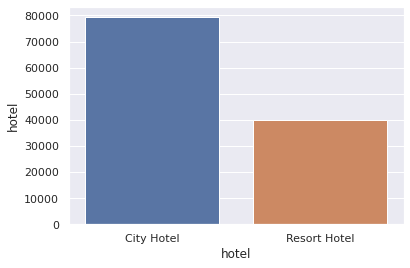

In [ ]:
d = data1.groupby('hotel')['hotel'].count()
sns.barplot(x=d.index, y=d)

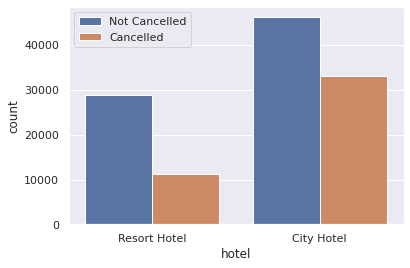

In [ ]:
sns.countplot(x='hotel', hue='is_canceled', data=data1)
plt.legend(['Not Cancelled', 'Cancelled'])#1.chi-square test 2.crosstab

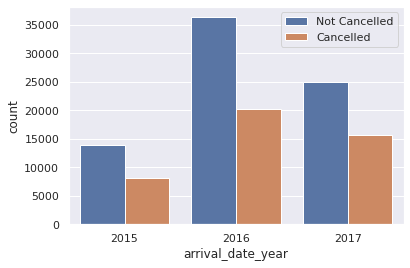

In [ ]:
sns.countplot(x='arrival_date_year', hue='is_canceled', data=data1)#t test
plt.legend(['Not Cancelled', 'Cancelled'])

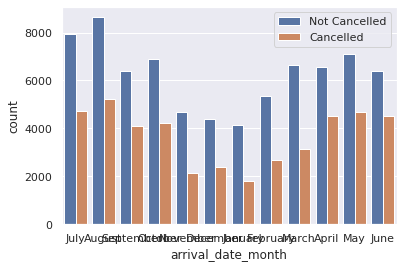

In [ ]:
sns.countplot(x='arrival_date_month', hue='is_canceled', data=data1)#t test
plt.legend(['Not Cancelled', 'Cancelled'])

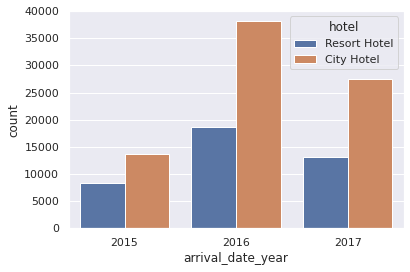

In [ ]:
sns.countplot(x='arrival_date_year', hue='hotel', data=data1)#t test

In [ ]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

Text(0.5, 1.0, 'Bookings by months')

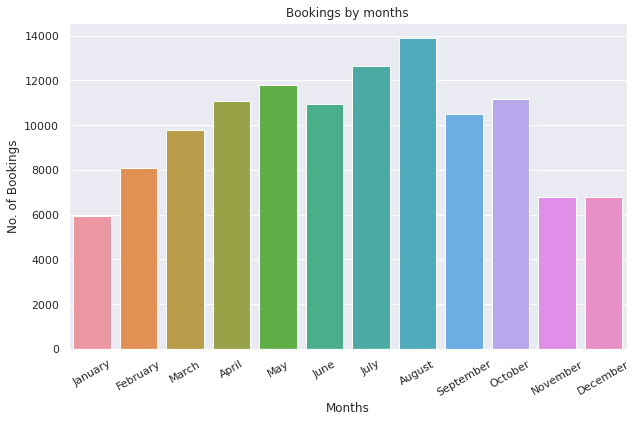

In [ ]:
d = data1.groupby("arrival_date_month")["arrival_date_month"].count()
plt.figure(figsize=(10,6))
sns.barplot(x=d.index, y=d, order=months)
p = plt.xticks(rotation=30)
plt.xlabel("Months")
plt.ylabel("No. of Bookings")
plt.title("Bookings by months")

Text(0.5, 1.0, 'Top 20 countries by number of guests')

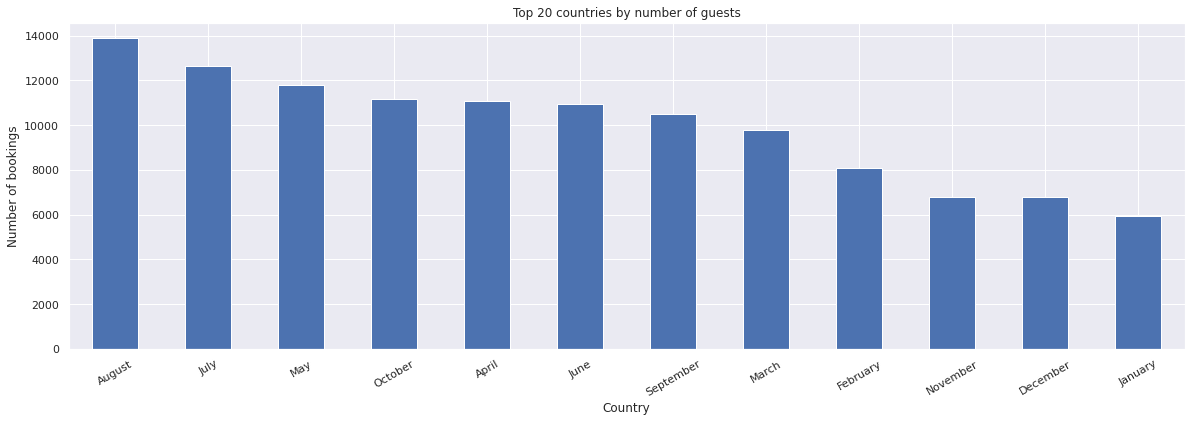

In [ ]:
plt.figure(figsize=(20,6))
d.sort_values(ascending=False)[:20].plot(kind='bar')
p = plt.xticks(rotation=30)
plt.xlabel("Country")
plt.ylabel("Number of bookings")
plt.title("Top 20 countries by number of guests")

Text(0.5, 1.0, 'Booked Hotel type by country')

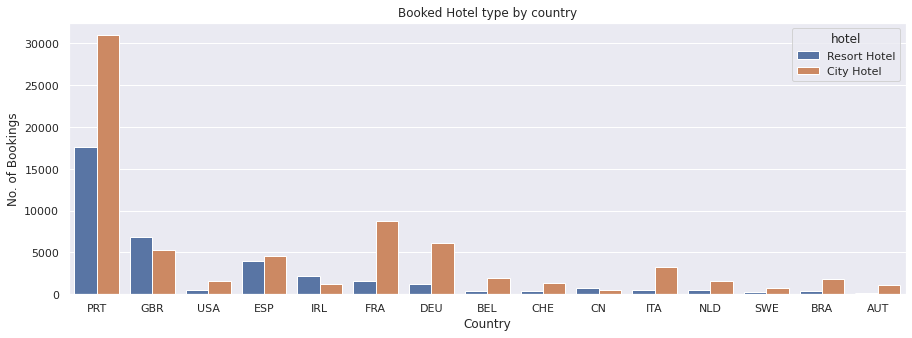

In [ ]:
d = data1['country'].value_counts().sort_values(ascending=False)[:15]
plt.figure(figsize=(15,5))
sns.countplot(x='country', hue='hotel', data=data1[data1['country'].isin(d.index)])
plt.xlabel("Country")
plt.ylabel("No. of Bookings")
plt.title("Booked Hotel type by country")

Text(0.5, 1.0, 'Daily Rate by hotel type')

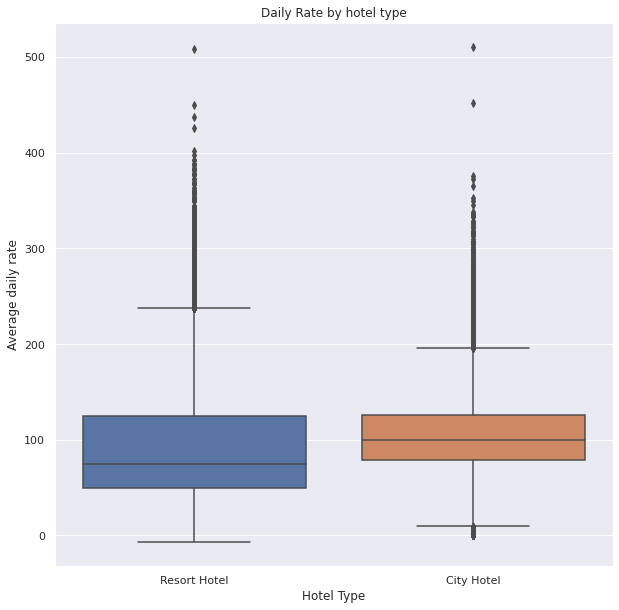

In [ ]:
plt.figure(figsize=(10,10))
data2 = data1.drop(data1[data1['adr']==5400].index, axis=0, inplace=False)  # Removed an extreme outlier (adr=5400) that made boxplot very squeezed to view
sns.boxplot(x='hotel', y='adr', data = data2)
plt.ylabel('Average daily rate')
plt.xlabel("Hotel Type")
plt.title("Daily Rate by hotel type")

Text(0.5, 1.0, 'Daily rate by hotel type')

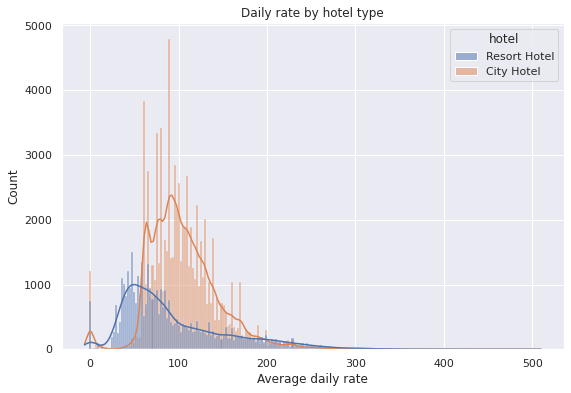

In [ ]:
plt.figure(figsize=(9,6))
sns.histplot(x='adr', hue='hotel', data=data2, kde=True)
plt.xlabel("Average daily rate")
plt.title("Daily rate by hotel type")

Text(0.5, 1.0, 'Average Daily rate by months')

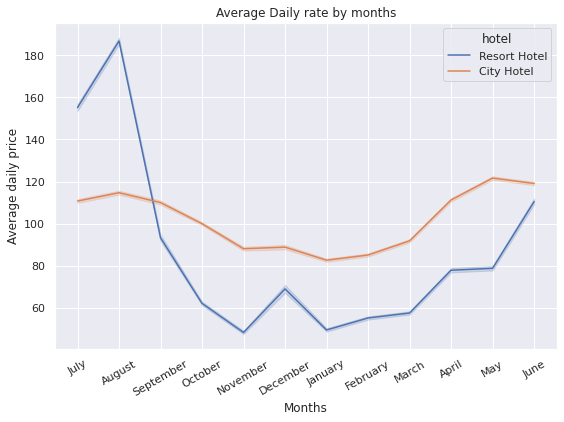

In [ ]:
plt.figure(figsize=(9,6))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data=data2)
plt.ylabel("Average daily price")
plt.xlabel("Months")
p = plt.xticks(rotation=30)
plt.title("Average Daily rate by months")

Text(0.5, 1.0, 'Daily rate by customer type')

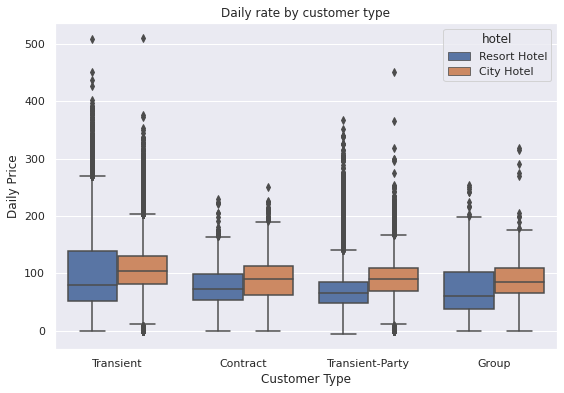

In [ ]:
plt.figure(figsize=(9,6))
sns.boxplot(x='customer_type', y='adr', hue='hotel', data=data2)
plt.ylabel("Daily Price")
plt.xlabel("Customer Type")
plt.title("Daily rate by customer type")

Text(0.5, 1.0, 'Bookings by market segment')

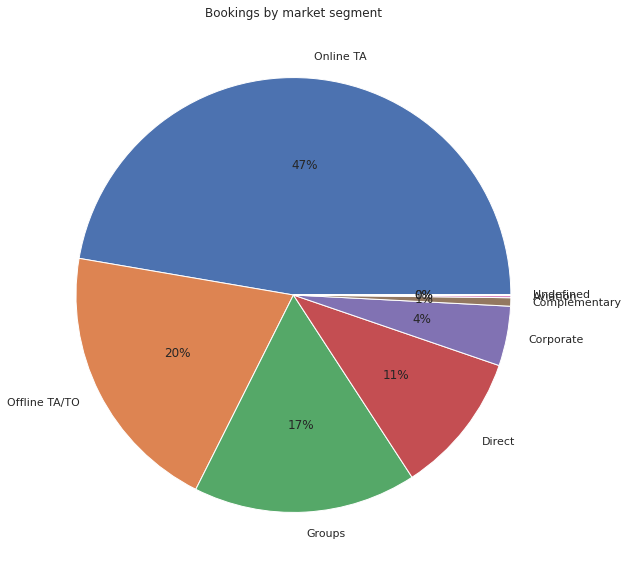

In [ ]:
d = data1['market_segment'].value_counts()
plt.figure(figsize=(10,10))
p = plt.pie(d, labels=d.index, autopct="%.0f%%")
plt.title("Bookings by market segment")

Text(0.5, 1.0, 'Hotel Preference by customer type')

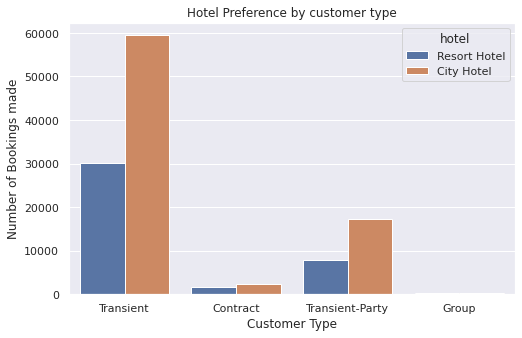

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='customer_type', hue='hotel', data=data1)
plt.xlabel("Customer Type")
plt.ylabel("Number of Bookings made")
plt.title("Hotel Preference by customer type")

In [ ]:
d = data1.groupby(['hotel','arrival_date_month']).agg({'is_canceled':'sum', 'meal':'count'}).reset_index().rename(columns={'is_canceled':'cancelled_bookings', 'meal':'total_bookings'})
d['cancellation_percentage'] = (d['cancelled_bookings']/d['total_bookings'])*100
d.head()

,hotel,arrival_date_month,cancelled_bookings,total_bookings,cancellation_percentage
0,City Hotel,April,3465,7480,46.323529
1,City Hotel,August,3602,8983,40.097963
2,City Hotel,December,1740,4132,42.110358
3,City Hotel,February,1901,4965,38.288016
4,City Hotel,January,1482,3736,39.668094


Text(0.5, 1.0, 'Cancellations per month')

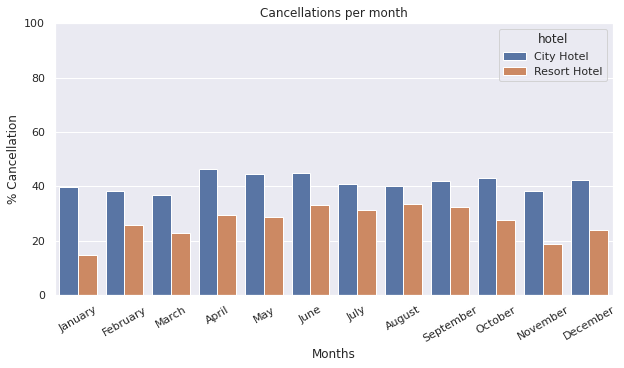

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='arrival_date_month', y='cancellation_percentage', hue='hotel', data=d, order=months)
plt.ylim((0,100))
plt.xticks(rotation=30)
plt.xlabel("Months")
plt.ylabel("% Cancellation")
plt.title("Cancellations per month")

In [ ]:
d = data1.groupby('lead_time').agg({'is_canceled':'sum', 'hotel':'count'}).reset_index().rename(columns={'is_canceled':'cancelled_bookings', 'hotel':'total_bookings'})
d['cancellation_percentage'] = (d['cancelled_bookings']/d['total_bookings'])*100
d.head()

,lead_time,cancelled_bookings,total_bookings,cancellation_percentage
0,0,430,6345,6.776990
1,1,321,3460,9.277457
2,2,213,2069,10.294828
3,3,182,1816,10.022026
4,4,176,1715,10.262391


Text(0.5, 1.0, 'Effect of Lead time on Cancellations')

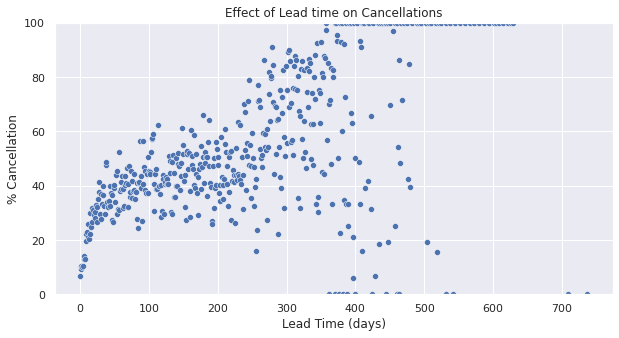

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='lead_time', y='cancellation_percentage', data=d)
plt.ylim((0,100))
plt.xlabel("Lead Time (days)")
plt.ylabel("% Cancellation")
plt.title("Effect of Lead time on Cancellations")

In [ ]:
ClusData=d[['lead_time','cancellation_percentage']]
kMeans=KMeans(n_clusters=3).fit(ClusData.values)


Text(0.5, 1.0, 'Effect of Lead time on Cancellations')

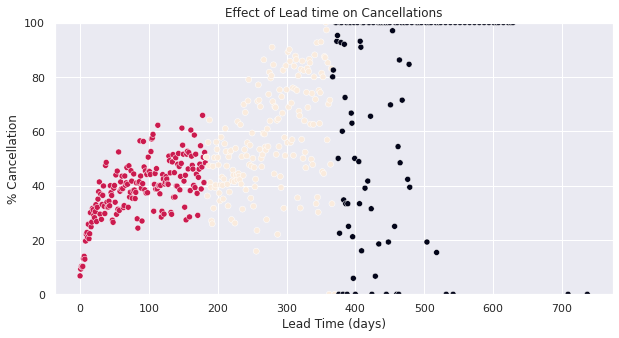

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='lead_time', y='cancellation_percentage', data=d,c=kMeans.labels_)
plt.ylim((0,100))
plt.xlabel("Lead Time (days)")
plt.ylabel("% Cancellation")
plt.title("Effect of Lead time on Cancellations")

Text(0.5, 1.0, 'Cancellations by repeated guests')

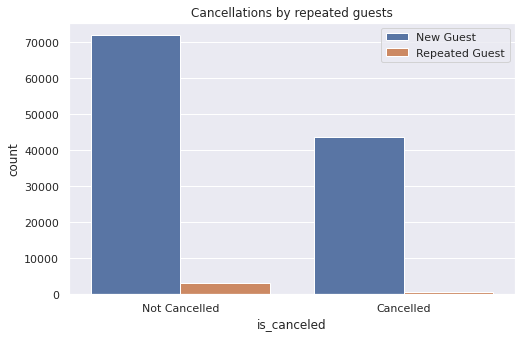

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x = "is_canceled", hue = 'is_repeated_guest', data = data1)
plt.legend(['New Guest', 'Repeated Guest'])
plt.xticks(ticks=[0,1], labels=['Not Cancelled', 'Cancelled'])
plt.title("Cancellations by repeated guests")

Text(0.5, 1.0, 'Types of Rooms reserved')

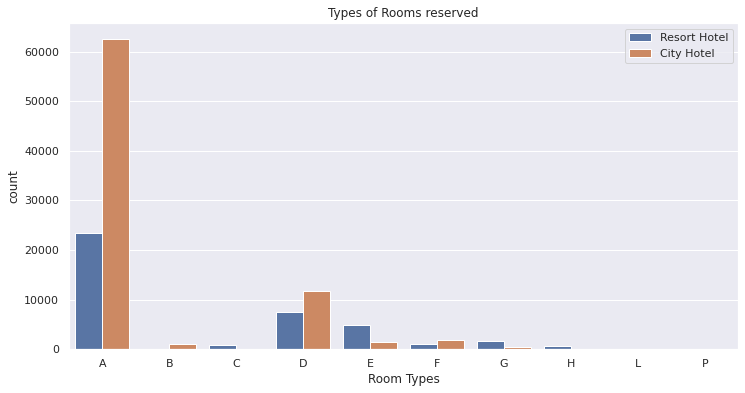

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(x='reserved_room_type', hue='hotel', data=data1, order=sorted(data1['reserved_room_type'].unique()))
plt.xlabel("Room Types")
plt.legend(loc=1)
plt.title("Types of Rooms reserved")

Text(0.5, 1.0, 'Most Denied Room Types')

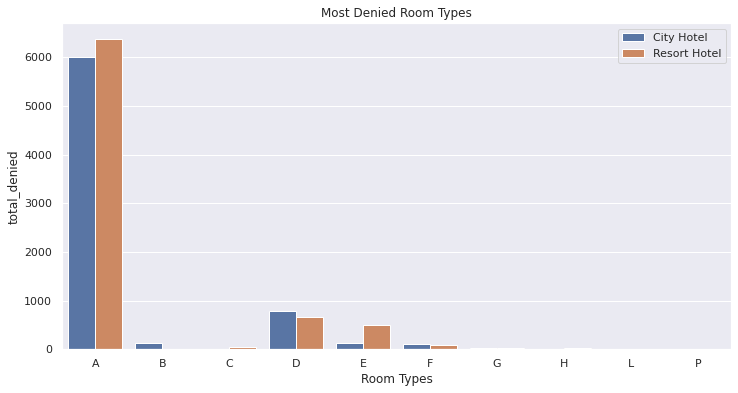

In [ ]:
d = data1.loc[data1['reserved_room_type'] != data1['assigned_room_type']].groupby(['reserved_room_type','hotel'])['meal'].count().reset_index().rename(columns={'meal':'total_denied'})

plt.figure(figsize = (12,6))
sns.barplot(x='reserved_room_type', y='total_denied', hue='hotel', data=d, order=sorted(data1['reserved_room_type'].unique()))
plt.xlabel("Room Types")
plt.legend(loc=1)
plt.title("Most Denied Room Types")

Text(0.5, 1.0, 'Types of Rooms assigned')

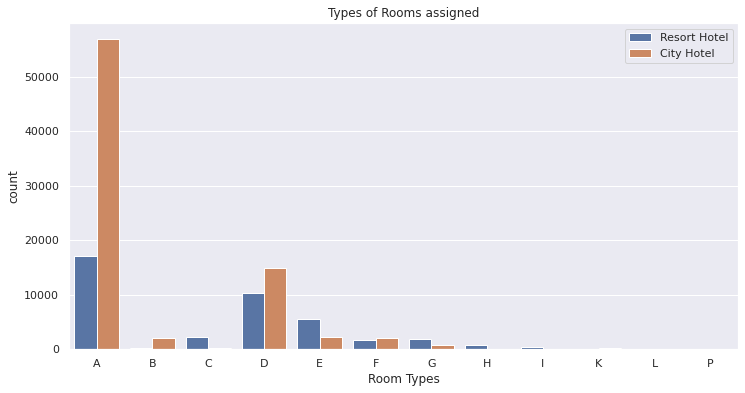

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(x='assigned_room_type', hue='hotel', data=data1, order=sorted(data1['assigned_room_type'].unique()))
plt.xlabel("Room Types")
plt.legend(loc=1)
plt.title("Types of Rooms assigned")

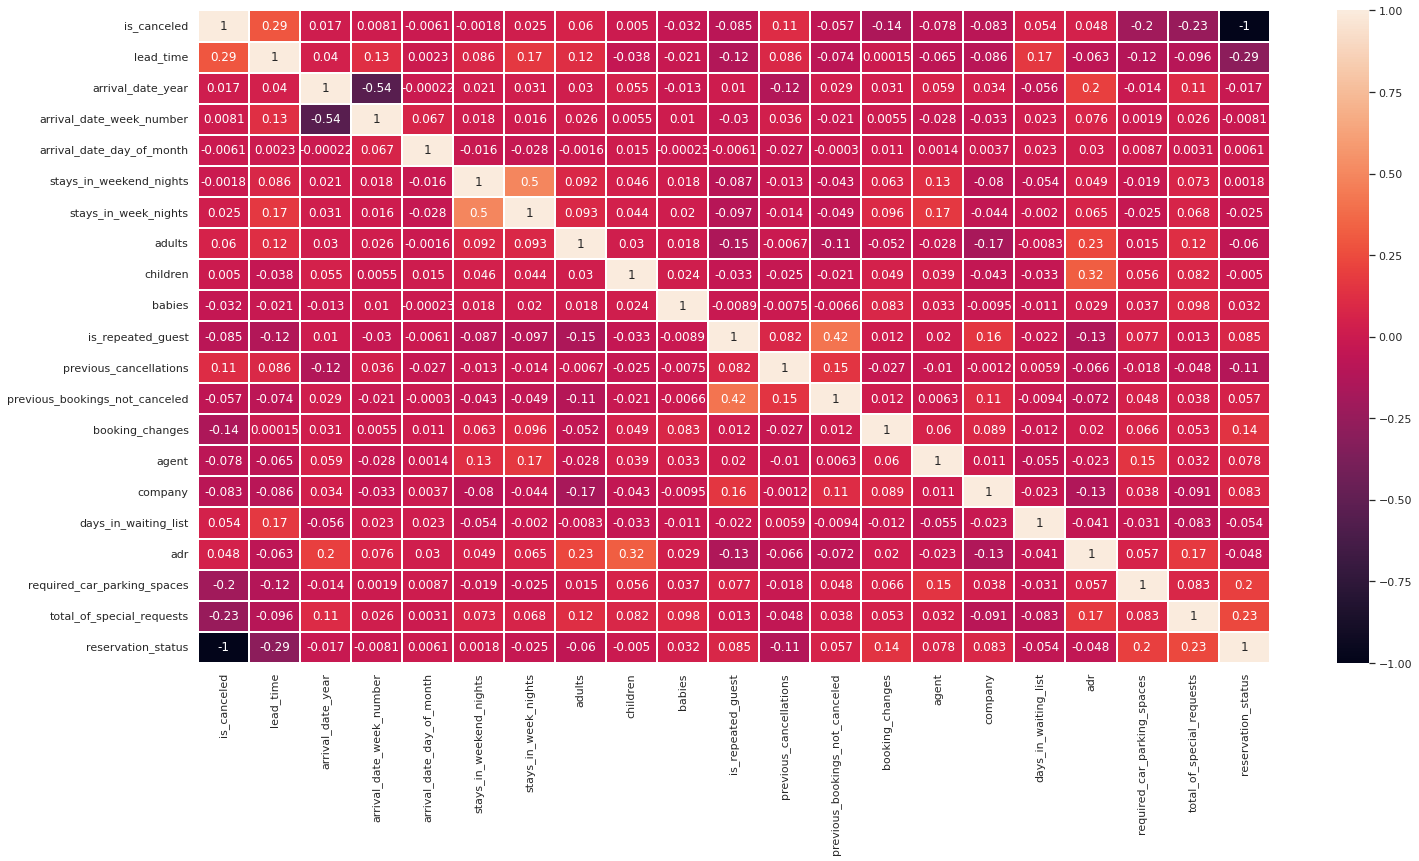

In [ ]:
plt.figure(figsize = (24, 12))

corr = data1.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

***DATA ENCODİNG***

In [ ]:
data1.drop('reservation_status_date',axis=1,inplace=True)


In [ ]:
data1.drop('name',axis=1,inplace=True)

In [ ]:
data1.select_dtypes(include=["object"])

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient
...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,August,BB,BEL,Offline TA/TO,TA/TO,A,A,No Deposit,Transient
119386,City Hotel,August,BB,FRA,Online TA,TA/TO,E,E,No Deposit,Transient
119387,City Hotel,August,BB,DEU,Online TA,TA/TO,D,D,No Deposit,Transient
119388,City Hotel,August,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient


In [ ]:
data1.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status'],
      dtype='object')

In [ ]:
data1.select_dtypes(include=["object"]).columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type'],
      dtype='object')

In [ ]:
data1.select_dtypes(exclude=["object"]).columns

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status'],
      dtype='object')

In [ ]:
encodedData=pd.DataFrame()

In [ ]:
enc=preprocessing.LabelEncoder()

In [ ]:
encodedData=data1[['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status']]

In [ ]:
for i in ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type']:
  encod = enc.fit_transform(data1[i].values)
  encodedData[i] = encod.tolist()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
encodedData['is_canceled']=encodedData['is_canceled'].replace(0,'No')
encodedData['is_canceled']=encodedData['is_canceled'].replace(1,'Yes')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
X=encodedData.values[:,1:]
y=encodedData['is_canceled'].values

In [ ]:
Xtrain, Xtest,yTrain,yTest=train_test_split(X,y,test_size=0.2,random_state=151)

**DATA CLASSIFICATION**

***Logistic Regression***

In [ ]:
lr = LogisticRegression(solver='liblinear')

In [ ]:
lr.fit(Xtrain, yTrain)

LogisticRegression(solver='liblinear')

In [ ]:
y_pred = lr.predict(Xtest)

In [ ]:
clf_report = classification_report(yTest, y_pred)

In [ ]:
print(clf_report)

              precision    recall  f1-score   support

          No       1.00      1.00      1.00     15074
         Yes       1.00      1.00      1.00      8804

    accuracy                           1.00     23878
   macro avg       1.00      1.00      1.00     23878
weighted avg       1.00      1.00      1.00     23878



**KNN Classifier**

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(Xtrain, yTrain)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(Xtest)

In [ ]:
clf_report = classification_report(yTest, y_pred)

In [ ]:
print(clf_report)

              precision    recall  f1-score   support

          No       0.83      0.86      0.85     15074
         Yes       0.75      0.70      0.73      8804

    accuracy                           0.80     23878
   macro avg       0.79      0.78      0.79     23878
weighted avg       0.80      0.80      0.80     23878



**Decision Tree Classifier**

In [ ]:
dtc = DecisionTreeClassifier()

In [ ]:
dtc.fit(Xtrain, yTrain)

DecisionTreeClassifier()

In [ ]:
y_pred = dtc.predict(Xtest)

In [ ]:
clf_report = classification_report(yTest, y_pred)

In [ ]:
print(clf_report)

              precision    recall  f1-score   support

          No       1.00      1.00      1.00     15074
         Yes       1.00      1.00      1.00      8804

    accuracy                           1.00     23878
   macro avg       1.00      1.00      1.00     23878
weighted avg       1.00      1.00      1.00     23878



**Random Forest Classifier**

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
rfc.fit(Xtrain, yTrain)

RandomForestClassifier()

In [ ]:
y_pred = rfc.predict(Xtest)

In [ ]:
clf_report = classification_report(yTest, y_pred)

In [ ]:
print(clf_report)

              precision    recall  f1-score   support

          No       1.00      1.00      1.00     15074
         Yes       1.00      1.00      1.00      8804

    accuracy                           1.00     23878
   macro avg       1.00      1.00      1.00     23878
weighted avg       1.00      1.00      1.00     23878



**Ada Boost Classifier**

In [ ]:
abc = AdaBoostClassifier()

In [ ]:
abc.fit(Xtrain, yTrain)

AdaBoostClassifier()

In [ ]:
y_pred = abc.predict(Xtest)

In [ ]:
clf_report = classification_report(yTest, y_pred)

In [ ]:
print(clf_report)

              precision    recall  f1-score   support

          No       1.00      1.00      1.00     15074
         Yes       1.00      1.00      1.00      8804

    accuracy                           1.00     23878
   macro avg       1.00      1.00      1.00     23878
weighted avg       1.00      1.00      1.00     23878



**Gradient Boosting Classifier**

In [ ]:
gdc = GradientBoostingClassifier()

In [ ]:
gdc.fit(Xtrain, yTrain)

GradientBoostingClassifier()

In [ ]:
y_pred = gdc.predict(Xtest)

In [ ]:
clf_report = classification_report(yTest, y_pred)

In [ ]:
print(clf_report)

              precision    recall  f1-score   support

          No       1.00      1.00      1.00     15074
         Yes       1.00      1.00      1.00      8804

    accuracy                           1.00     23878
   macro avg       1.00      1.00      1.00     23878
weighted avg       1.00      1.00      1.00     23878



**XGBoost Classifier**

In [ ]:
xgb = XGBClassifier()

In [ ]:
xgb.fit(Xtrain, yTrain)

XGBClassifier()

In [ ]:
y_pred = xgb.predict(Xtest)

In [ ]:
clf_report = classification_report(yTest, y_pred)

In [ ]:
print(clf_report)

              precision    recall  f1-score   support

          No       1.00      1.00      1.00     15074
         Yes       1.00      1.00      1.00      8804

    accuracy                           1.00     23878
   macro avg       1.00      1.00      1.00     23878
weighted avg       1.00      1.00      1.00     23878

